# **МОМО II_ДОМАШНЕЕ ЗАДАНИЕ № 1**

# **Import библиотек**


In [480]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy.stats import norm
from scipy import stats

from sklearn.neighbors import KNeighborsRegressor # Регрессия К-Ближайших соседей от scikit-learn
from sklearn.neighbors import  KNeighborsClassifier # Классификация К-Ближайших соседей от scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
from sklearn.preprocessing import MinMaxScaler # Объект Нормализации от Scikit-learn
from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации

from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
import scipy.stats as stats # статистические функции библиотеки scipy

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score as acc # функция расчета доли правильных ответов от Scikit-learn
from sklearn.metrics import f1_score as f1 # функция расчета f1-меры от Scikit-learn
from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки

from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
     

# **Считываем файл в DataFrame**

Загружаем данные из файла по прямой ссылке на git-hub

In [412]:
df = pd.read_csv('https://raw.githubusercontent.com/dayekb/Basic_ML_Alg/main/cars_moldova_clean.csv', delimiter = ',') # можно считывать открытые файлы из интернета

In [413]:
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32069  Volkswagen        Passat  2016      Sedan   88000.0   
32070  Land Rover    Freelander  2002  Crossover  225000.0   
32071       Dacia     Logan Mcv  2015  Universal   89000.0   
32072       Mazda             6  2006      Combi  370000.0   
32073     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  \
0                    1800.0        Hybrid    Automatic       7750.0   
1                    1500.0        Diesel       Manual       8550.0   
2                    1500.0        Diesel       Manual       6550.0   
3                    1600.0  Metan/Propan       Manual       4100.0   
4                    2200.0        Diesel       Manual       3490.0   
...                     ...           ...          ...          ...   
32069                1800.0        Petrol    Automatic      11500.0   
32070                1800.0  Metan/Propan       Manual       4400.0   
32071                1500.0        Diesel       Manual       7000.0   
32072                2000.0        Diesel       Manual       4000.0   
32073                1500.0        Diesel       Manual       4000.0   

            km_year  
0      17727.272727  
1      16875.000000  
2      11000.000000  
3      12500.000000  
4      13636.363636  
...             ...  
32069  14666.666667  
32070  11250.000000  
32071  12714.285714  
32072  23125.000000  
32073  18750.000000  

[32074 rows x 10 columns]

# **Информация о DataFrame**

In [414]:
df.info() # информация о данных в датафрейме: сколько строк, какие данные в столбцах, сколько пропущенных значений (Nan-values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32074 non-null  object 
 1   Model                 32074 non-null  object 
 2   Year                  32074 non-null  int64  
 3   Style                 32074 non-null  object 
 4   Distance              32074 non-null  float64
 5   Engine_capacity(cm3)  32074 non-null  float64
 6   Fuel_type             32074 non-null  object 
 7   Transmission          32074 non-null  object 
 8   Price(euro)           32074 non-null  float64
 9   km_year               32074 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.4+ MB


# **EDA - Разведывательный анализ данных**

Метод .info()

In [415]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32074 non-null  object 
 1   Model                 32074 non-null  object 
 2   Year                  32074 non-null  int64  
 3   Style                 32074 non-null  object 
 4   Distance              32074 non-null  float64
 5   Engine_capacity(cm3)  32074 non-null  float64
 6   Fuel_type             32074 non-null  object 
 7   Transmission          32074 non-null  object 
 8   Price(euro)           32074 non-null  float64
 9   km_year               32074 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.4+ MB


Найдем категориальные и численные столбцы

In [416]:
# определим категориальные и численные столбцы
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year'] 
 Число столблцов =  5


# **Анализ числовых признаков**

In [417]:
df.describe() # выводим информацию о числовых столбцах

Year       Distance  Engine_capacity(cm3)    Price(euro)  \
count  32074.000000   32074.000000          32074.000000   32074.000000   
mean    2008.336004  180297.720646           1868.531770    9479.187722   
std        7.162778   90541.530459            609.824918    9531.545838   
min     1971.000000     100.000000            200.000000     200.000000   
25%     2005.000000  123000.000000           1500.000000    3600.000000   
50%     2010.000000  180000.000000           1800.000000    6799.000000   
75%     2014.000000  235359.250000           2000.000000   12075.250000   
max     2021.000000  500000.000000           5000.000000  100000.000000   

            km_year  
count  32074.000000  
mean   14882.489475  
std     7251.805242  
min      100.000000  
25%    10250.000000  
50%    14432.509804  
75%    18800.000000  
max    50000.000000

## **Добавление колонки**

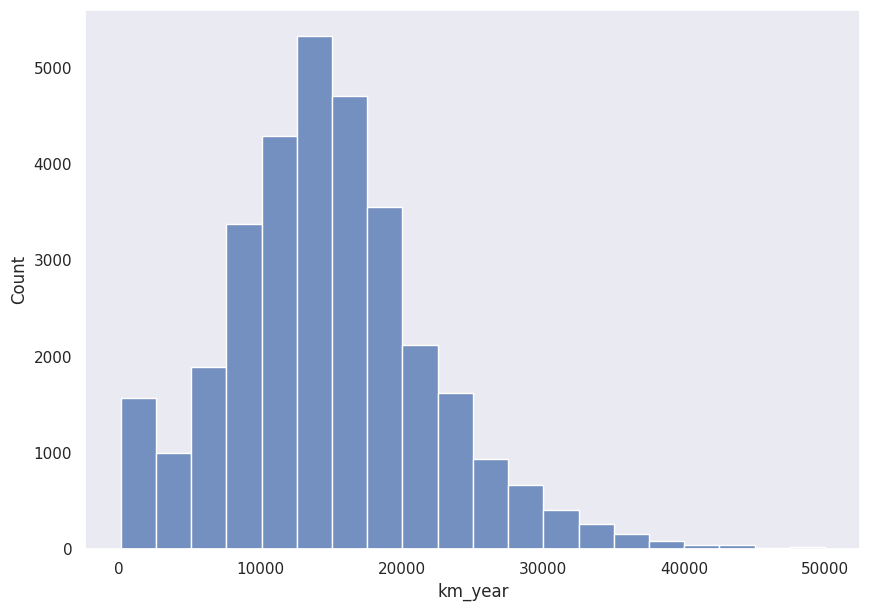

In [418]:
df['Age'] = 2022 - df.Year # новый столбец как Константа минус старый

df['km_year'] = df.Distance/df.Age # делим один столбец на другой
#удалим дополнительно еще некоторые очень высокие значения
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
#удалим дополнительно еще некоторые очень низкие значения
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

# визуализируем результат
plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year', bins = 20);

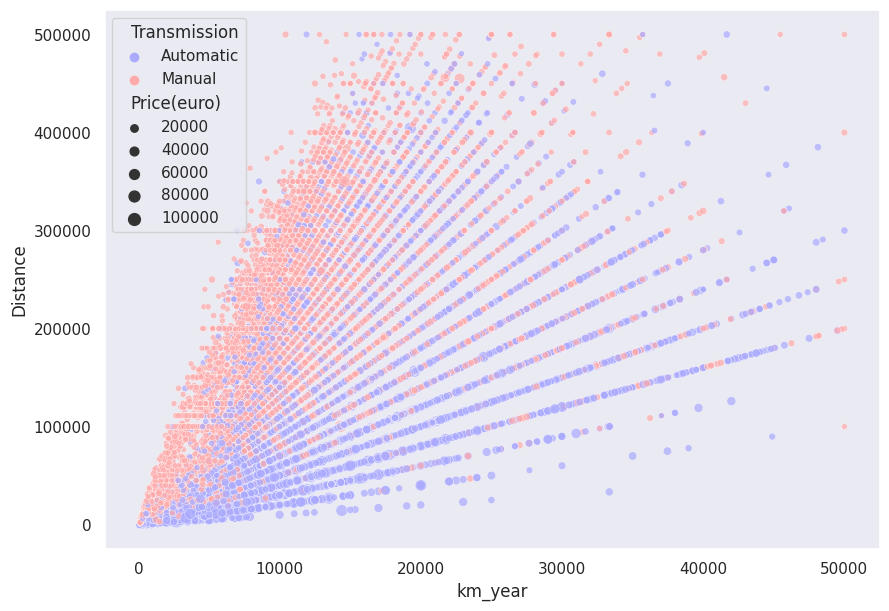

In [419]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df, # какой датафрейм используем
    x="km_year", # какую переменную используем для горизонтальной оси
    y="Distance",# какую переменную используем для вертикальной оси
    hue="Transmission", # какую переменную используем для подкрашиваиния данных.
    size = "Price(euro)", # какую переменную используем для задания размера
    alpha = 0.7, # прозрачность
             palette='bwr' # какую цветовую карту используем.
    );

## Удаление аномалий и связанных признаков

In [420]:
num_columns.append('Age') # добавили в список числовых данных название новой колонки
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year', 'Age']

In [421]:
df.describe() 

Year       Distance  Engine_capacity(cm3)    Price(euro)  \
count  32074.000000   32074.000000          32074.000000   32074.000000   
mean    2008.336004  180297.720646           1868.531770    9479.187722   
std        7.162778   90541.530459            609.824918    9531.545838   
min     1971.000000     100.000000            200.000000     200.000000   
25%     2005.000000  123000.000000           1500.000000    3600.000000   
50%     2010.000000  180000.000000           1800.000000    6799.000000   
75%     2014.000000  235359.250000           2000.000000   12075.250000   
max     2021.000000  500000.000000           5000.000000  100000.000000   

            km_year           Age  
count  32074.000000  32074.000000  
mean   14882.489475     13.663996  
std     7251.805242      7.162778  
min      100.000000      1.000000  
25%    10250.000000      8.000000  
50%    14432.509804     12.000000  
75%    18800.000000     17.000000  
max    50000.000000     51.000000

# **Исследовательский анализ данных**

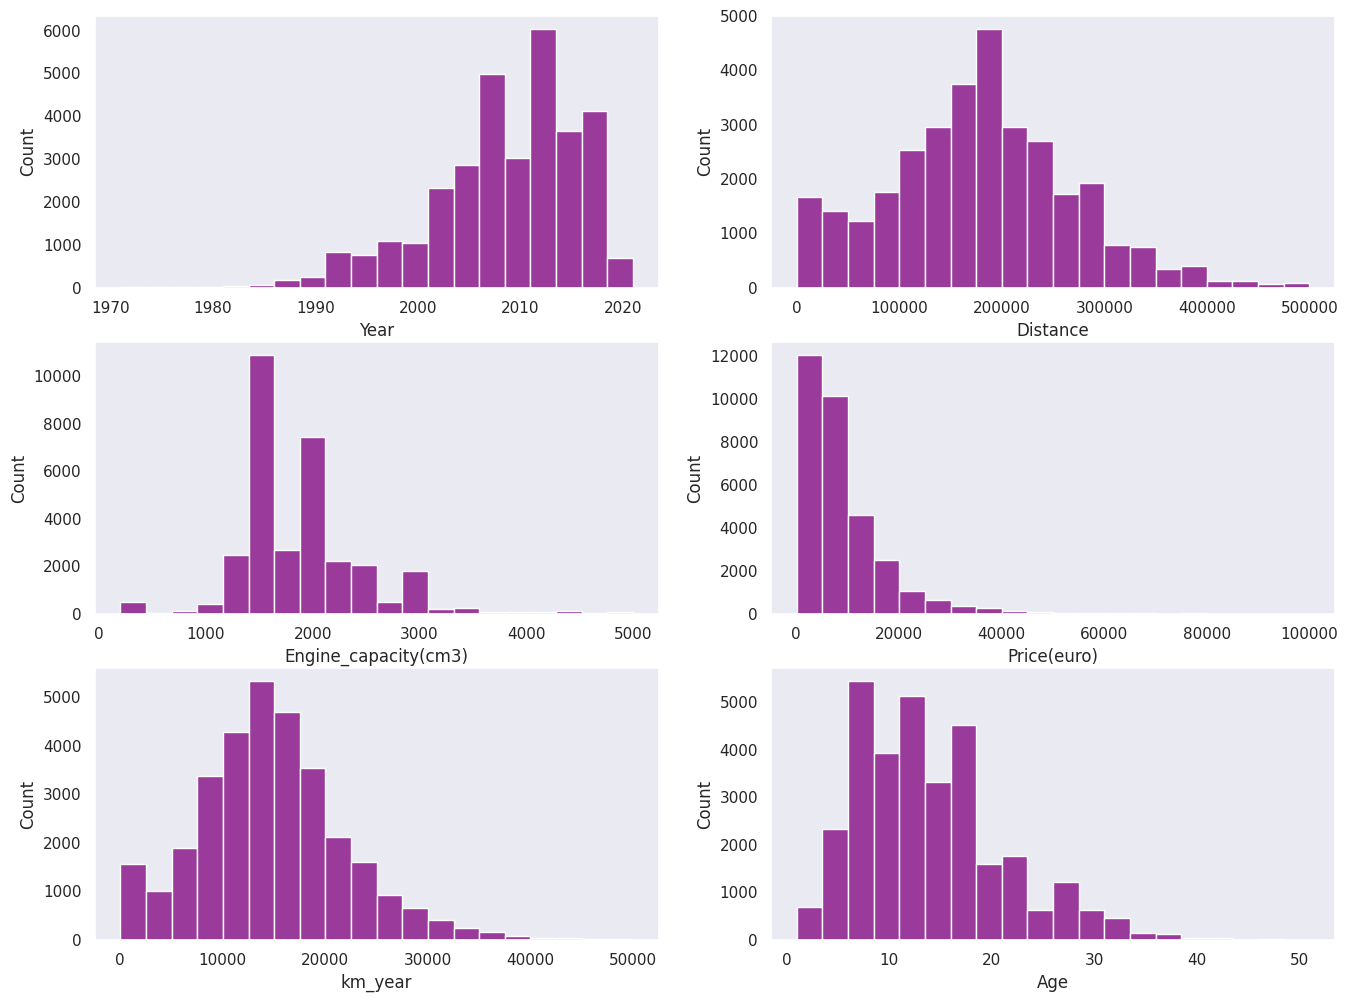

In [422]:
# строим гистограмму для числовых данных
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,12))
sns.set_style('dark')

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20,color = "purple");



Из графиков видно, что выше уровень продаж автомобилей с параметром Age до 20 лет, Distance менее 0.4, Price менее 20 000 euro, km_year менее 20 000, Egine_capacity (cm3) в интервале от 1 500 до 2 000. Значительный рост продаж автомобилей произошел начиная с 2000 года

<Figure size 1500x1500 with 0 Axes>

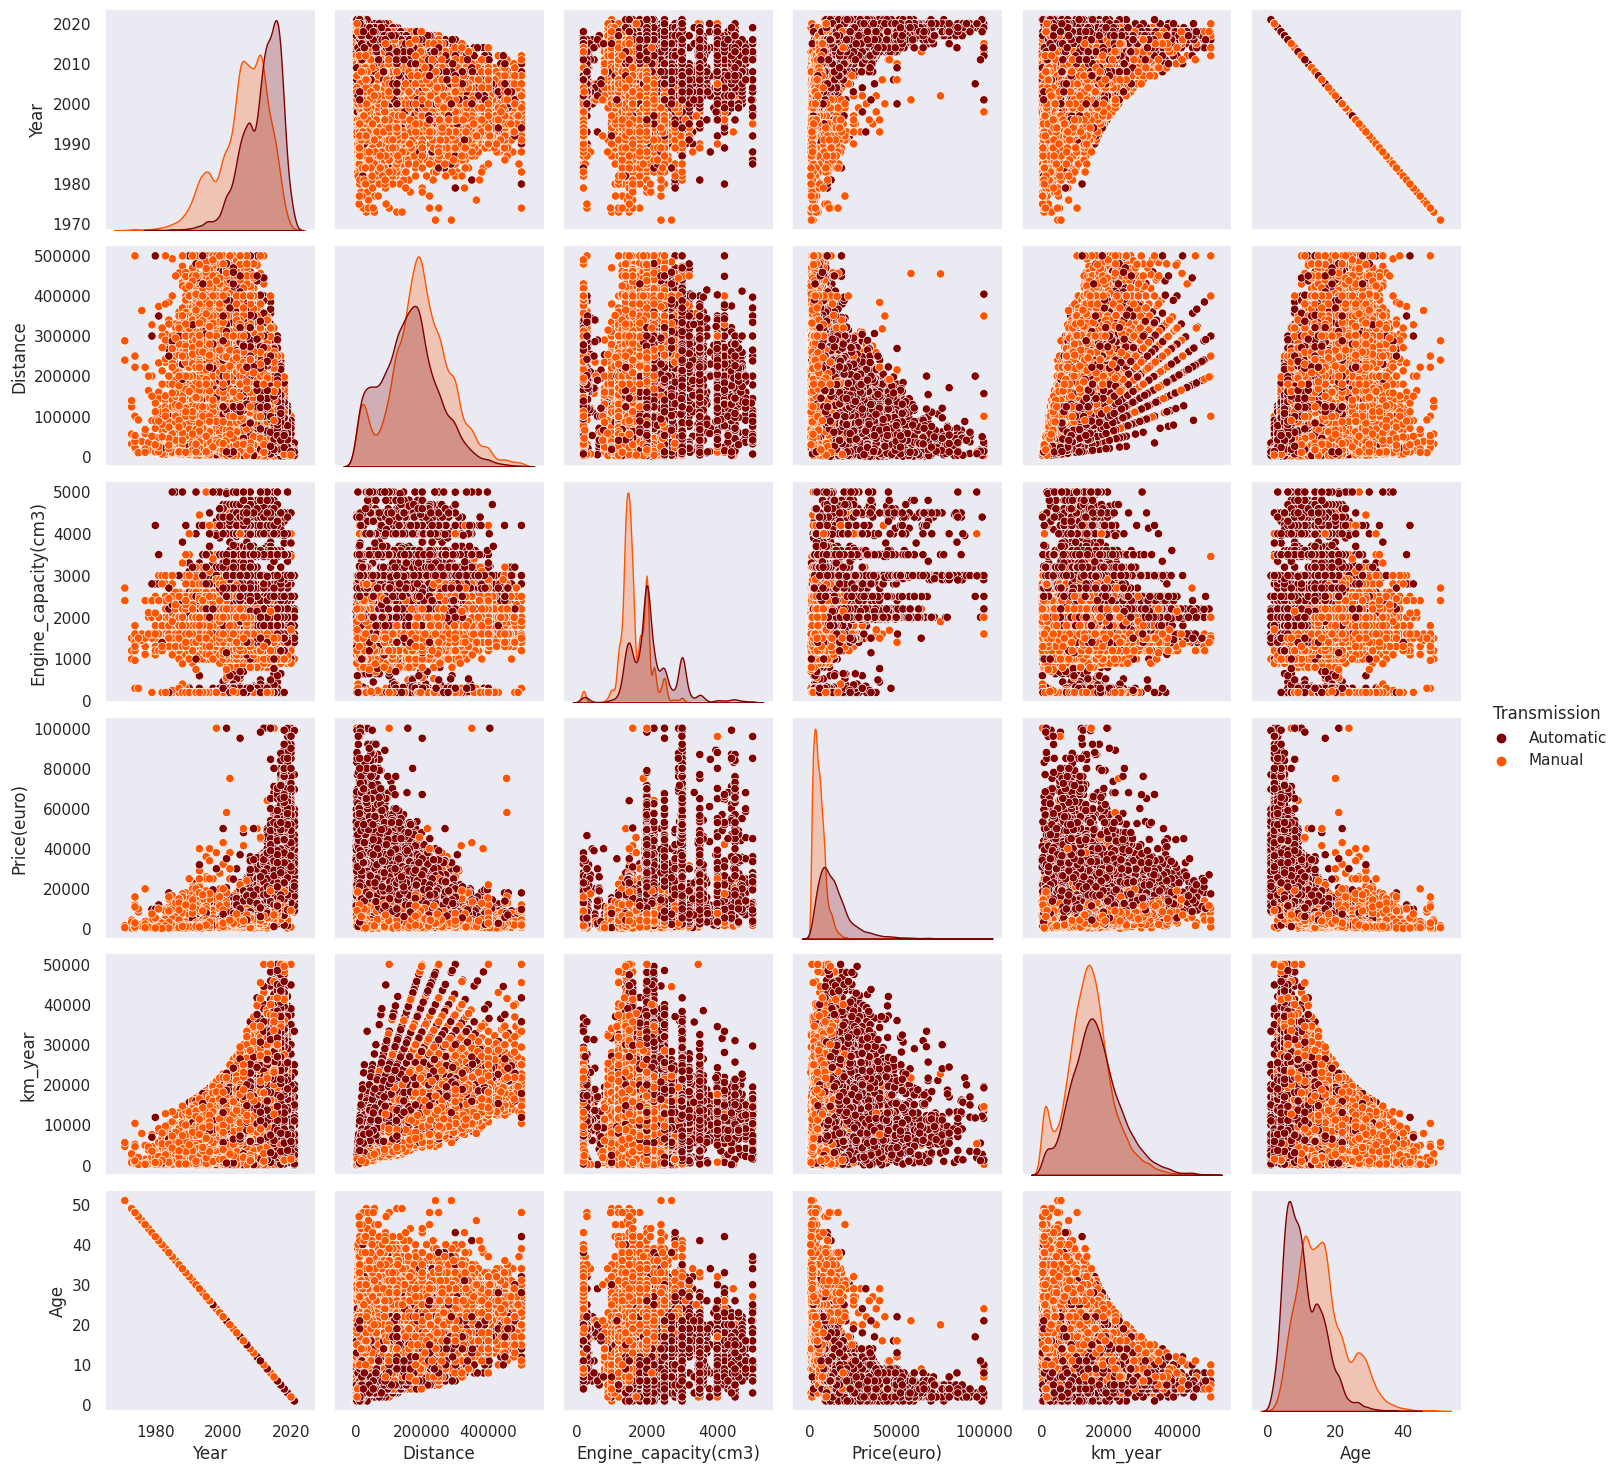

In [423]:
# построим  график зависимости показателей друг от друга
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='Transmission',
             palette = 'gist_heat');

На графиках видно, что чем выше возраст автомобиля, тем ниже его цена и объем продаж

<Axes: xlabel='Age', ylabel='Price(euro)'>

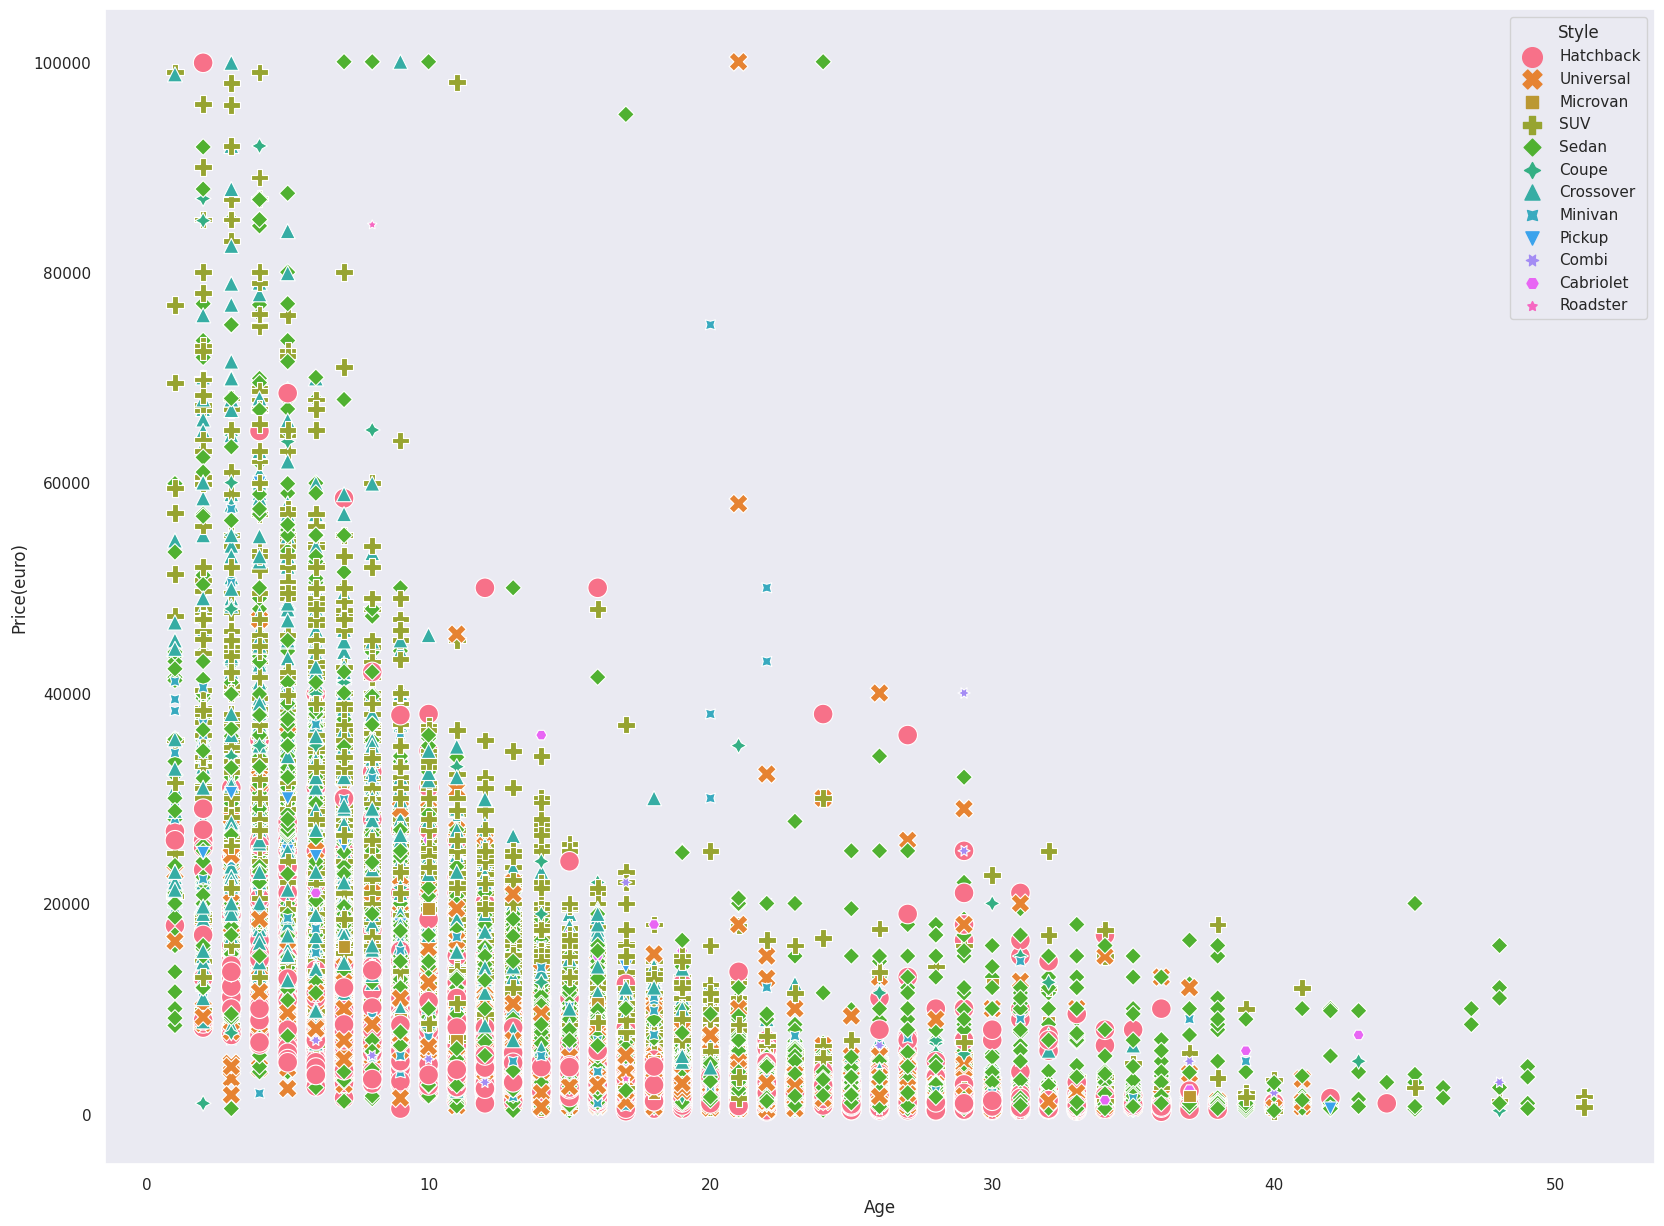

In [424]:
# строим скатерограмму для определения зависимости  между пaрaметрами Price (euro), Age, Style
sns.set_style('dark')
plt.figure(figsize=(20,15))

sns.scatterplot(x ='Age',
             y ='Price(euro)',
             data = df, hue = 'Style', size = 'Style', sizes = (50,200),style='Style')

Из графика видно, что чем старше автомобиль , тем он дешевле. В диапазоне от 40 до 50 лет преобладает Sedan стоимостью менее 20 000 euro. На графике присутствуют выбросы: от 20 до 30 лет Universal, Hatchback

<Axes: xlabel='Year', ylabel='Count'>

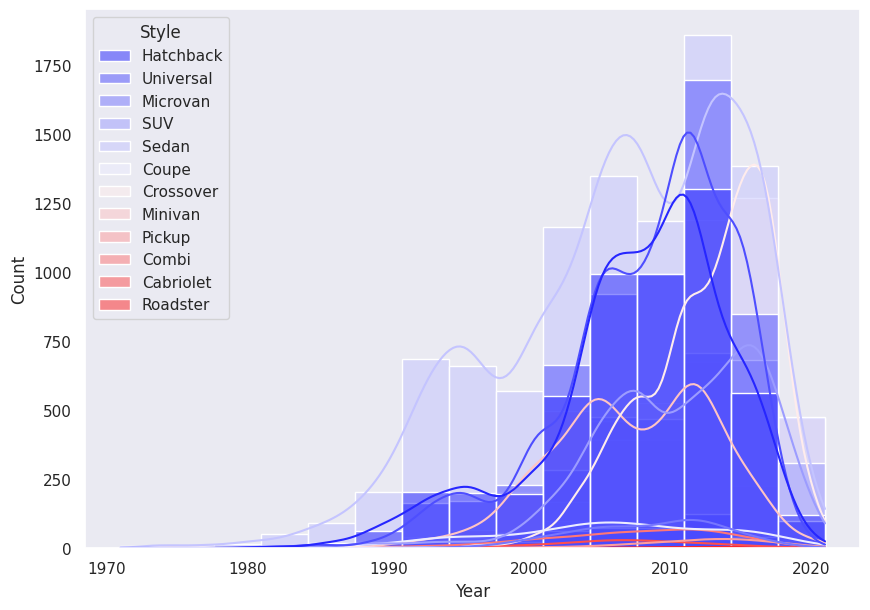

In [425]:
# Построим гистограмму с параметрами тип автомобиля и год выпуска
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Year',
             hue = 'Style',
             bins = 15, kde = True,
             palette='bwr')

Вышеуказанная гистограмма показывает распределение типов атомобилей по годам выпуска. На графике видно, что с течением времени увечиливается количество типов автомобилей и изменяется распределением по типам

# **Добавление в модель дополнительных признаков на основе имеющихся**

Добавим признак

In [426]:
# рассчитаем среднюю стоимость автомобиля в зависимости от производителя и добавим в отдельный столбец
df['Price_mean_by_Make'] = df.groupby(['Make'])['Price(euro)'].transform('mean')

df


Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32069  Volkswagen        Passat  2016      Sedan   88000.0   
32070  Land Rover    Freelander  2002  Crossover  225000.0   
32071       Dacia     Logan Mcv  2015  Universal   89000.0   
32072       Mazda             6  2006      Combi  370000.0   
32073     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  \
0                    1800.0        Hybrid    Automatic       7750.0   
1                    1500.0        Diesel       Manual       8550.0   
2                    1500.0        Diesel       Manual       6550.0   
3                    1600.0  Metan/Propan       Manual       4100.0   
4                    2200.0        Diesel       Manual       3490.0   
...                     ...           ...          ...          ...   
32069                1800.0        Petrol    Automatic      11500.0   
32070                1800.0  Metan/Propan       Manual       4400.0   
32071                1500.0        Diesel       Manual       7000.0   
32072                2000.0        Diesel       Manual       4000.0   
32073                1500.0        Diesel       Manual       4000.0   

            km_year  Age  Price_mean_by_Make  
0      17727.272727   11         9650.734181  
1      16875.000000    8         6676.173635  
2      11000.000000   10         6676.173635  
3      12500.000000   16         4234.830574  
4      13636.363636   22        13069.230204  
...             ...  ...                 ...  
32069  14666.666667    6         6899.490872  
32070  11250.000000   20        22799.666667  
32071  12714.285714    7         5341.782186  
32072  23125.000000   16         5206.954233  
32073  18750.000000   16         6676.173635  

[32074 rows x 12 columns]

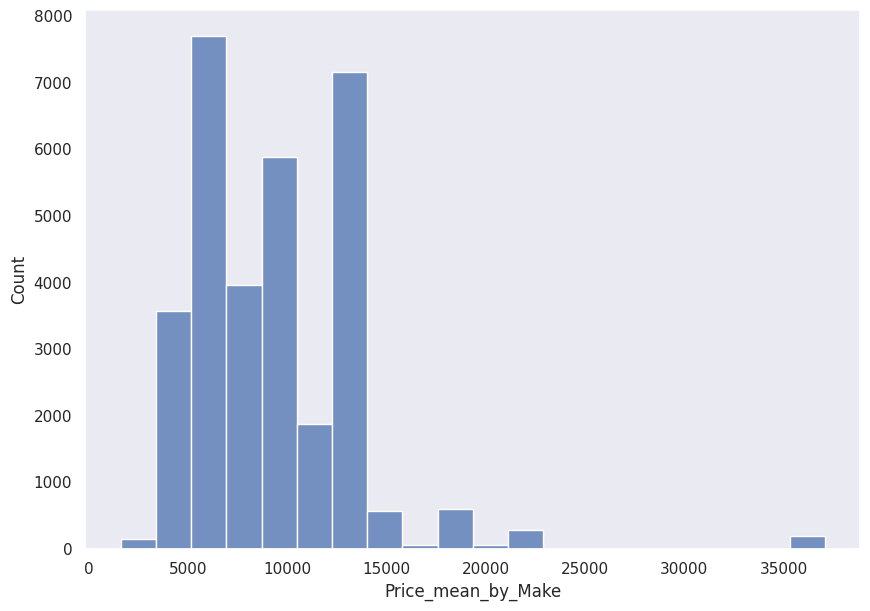

In [427]:
# посмотроим график нового параметра
plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='Price_mean_by_Make', bins = 20);

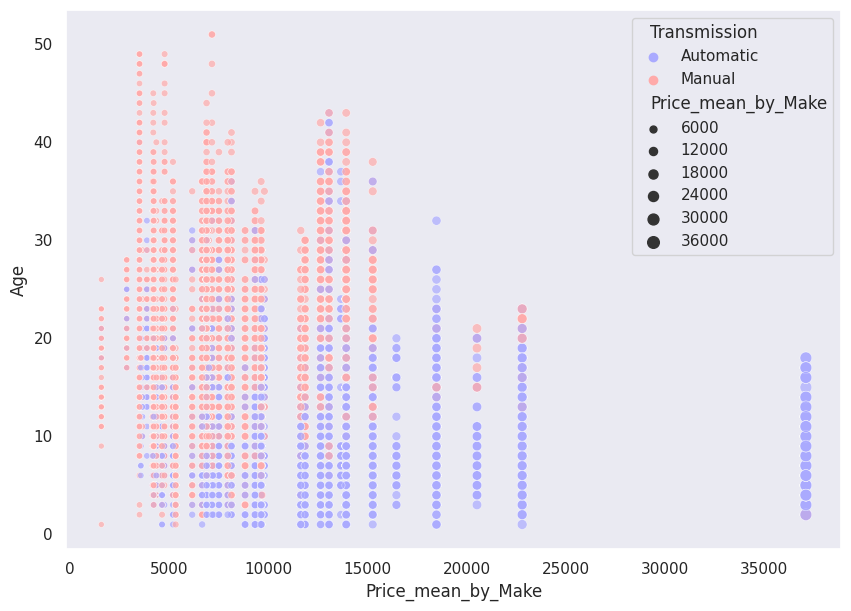

In [428]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Price_mean_by_Make", y= "Age",
    hue="Transmission", 
    size = "Price_mean_by_Make", alpha = 0.7,
             palette='bwr'
    );

In [429]:
df.describe()

Year       Distance  Engine_capacity(cm3)    Price(euro)  \
count  32074.000000   32074.000000          32074.000000   32074.000000   
mean    2008.336004  180297.720646           1868.531770    9479.187722   
std        7.162778   90541.530459            609.824918    9531.545838   
min     1971.000000     100.000000            200.000000     200.000000   
25%     2005.000000  123000.000000           1500.000000    3600.000000   
50%     2010.000000  180000.000000           1800.000000    6799.000000   
75%     2014.000000  235359.250000           2000.000000   12075.250000   
max     2021.000000  500000.000000           5000.000000  100000.000000   

            km_year           Age  Price_mean_by_Make  
count  32074.000000  32074.000000        32074.000000  
mean   14882.489475     13.663996         9479.187722  
std     7251.805242      7.162778         4265.504748  
min      100.000000      1.000000         1598.841270  
25%    10250.000000      8.000000         6875.368421  
50%    14432.509804     12.000000         8841.250290  
75%    18800.000000     17.000000        12643.533810  
max    50000.000000     51.000000        37094.994737

Новый признак средняя стоимость автомобиля в зависимости от производителя позволяет сравнивать текущую стоимость автомобиля со средней стоимостью автомобилей производителя

Посмотрим на корреляцию численных столбцов

In [430]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

<ipython-input-430-3e5ca5e3e7a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)


In [431]:
# определим категорию популярности автомобилю
# добавим столбец с расчетом количества автомобилей производителя к общему количеству автомобилей
df["Рopularity categories"] = df.groupby("Make")["Make"].transform('count')/df['Make'].count()*100
# разделим автомобили на категории
def f(row):
  if row['Рopularity categories'] < 1:
    val = 'Редкий'
  elif row['Рopularity categories'] < 5:
      val = 'Повседневный'
  else :
        val = 'Популярный'
  return val
# выведем категории автомобилей в новый столбец  
df['Рopularity categories_level'] = df.apply (f, axis=1)
df


Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32069  Volkswagen        Passat  2016      Sedan   88000.0   
32070  Land Rover    Freelander  2002  Crossover  225000.0   
32071       Dacia     Logan Mcv  2015  Universal   89000.0   
32072       Mazda             6  2006      Combi  370000.0   
32073     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  \
0                    1800.0        Hybrid    Automatic       7750.0   
1                    1500.0        Diesel       Manual       8550.0   
2                    1500.0        Diesel       Manual       6550.0   
3                    1600.0  Metan/Propan       Manual       4100.0   
4                    2200.0        Diesel       Manual       3490.0   
...                     ...           ...          ...          ...   
32069                1800.0        Petrol    Automatic      11500.0   
32070                1800.0  Metan/Propan       Manual       4400.0   
32071                1500.0        Diesel       Manual       7000.0   
32072                2000.0        Diesel       Manual       4000.0   
32073                1500.0        Diesel       Manual       4000.0   

            km_year  Age  Price_mean_by_Make  Рopularity categories  \
0      17727.272727   11         9650.734181               9.559144   
1      16875.000000    8         6676.173635               7.308100   
2      11000.000000   10         6676.173635               7.308100   
3      12500.000000   16         4234.830574               5.649436   
4      13636.363636   22        13069.230204               9.331546   
...             ...  ...                 ...                    ...   
32069  14666.666667    6         6899.490872              10.588015   
32070  11250.000000   20        22799.666667               0.888570   
32071  12714.285714    7         5341.782186               4.165368   
32072  23125.000000   16         5206.954233               1.362474   
32073  18750.000000   16         6676.173635               7.308100   

      Рopularity categories_level  
0                      Популярный  
1                      Популярный  
2                      Популярный  
3                      Популярный  
4                      Популярный  
...                           ...  
32069                  Популярный  
32070                      Редкий  
32071                Повседневный  
32072                Повседневный  
32073                  Популярный  

[32074 rows x 14 columns]

In [432]:
# присовим категорию стоимости автомобиля
# добавим столбец с расчетом средней стоимости автомобиля производителя к максимальной средней стоимости

df["Percent_of_Price_mean_by_Make"]=df.groupby(['Make'])['Price(euro)'].transform('mean')/df['Price_mean_by_Make'].max()*100
# разделим автомобили  по уровню средней цены
def f(row):
  if row['Percent_of_Price_mean_by_Make'] < 25:
    val = 'Дешевый'
  elif row['Percent_of_Price_mean_by_Make'] < 50:
      val = 'Средний уровень цен'
  else :
        val = 'Дорогой'
  return val
# выведем категории автомобилей по стоимости в новый столбец  
df['Price_mean_by_Make_level'] = df.apply (f, axis=1)
df

Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32069  Volkswagen        Passat  2016      Sedan   88000.0   
32070  Land Rover    Freelander  2002  Crossover  225000.0   
32071       Dacia     Logan Mcv  2015  Universal   89000.0   
32072       Mazda             6  2006      Combi  370000.0   
32073     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  \
0                    1800.0        Hybrid    Automatic       7750.0   
1                    1500.0        Diesel       Manual       8550.0   
2                    1500.0        Diesel       Manual       6550.0   
3                    1600.0  Metan/Propan       Manual       4100.0   
4                    2200.0        Diesel       Manual       3490.0   
...                     ...           ...          ...          ...   
32069                1800.0        Petrol    Automatic      11500.0   
32070                1800.0  Metan/Propan       Manual       4400.0   
32071                1500.0        Diesel       Manual       7000.0   
32072                2000.0        Diesel       Manual       4000.0   
32073                1500.0        Diesel       Manual       4000.0   

            km_year  Age  Price_mean_by_Make  Рopularity categories  \
0      17727.272727   11         9650.734181               9.559144   
1      16875.000000    8         6676.173635               7.308100   
2      11000.000000   10         6676.173635               7.308100   
3      12500.000000   16         4234.830574               5.649436   
4      13636.363636   22        13069.230204               9.331546   
...             ...  ...                 ...                    ...   
32069  14666.666667    6         6899.490872              10.588015   
32070  11250.000000   20        22799.666667               0.888570   
32071  12714.285714    7         5341.782186               4.165368   
32072  23125.000000   16         5206.954233               1.362474   
32073  18750.000000   16         6676.173635               7.308100   

      Рopularity categories_level  Percent_of_Price_mean_by_Make  \
0                      Популярный                      26.016271   
1                      Популярный                      17.997505   
2                      Популярный                      17.997505   
3                      Популярный                      11.416178   
4                      Популярный                      35.231789   
...                           ...                            ...   
32069                  Популярный                      18.599520   
32070                      Редкий                      61.462919   
32071                Повседневный                      14.400278   
32072                Повседневный                      14.036811   
32073                  Популярный                      17.997505   

      Price_mean_by_Make_level  
0          Средний уровень цен  
1                      Дешевый  
2                      Дешевый  
3                      Дешевый  
4          Средний уровень цен  
...                        ...  
32069                  Дешевый  
32070                  Дорогой  
32071                  Дешевый  
32072                  Дешевый  
32073                  Дешевый  

[32074 rows x 16 columns]

Выведим категории автомобилей по популярности и уровню цены в общу таблицу

In [433]:
df.groupby(['Make','Price_mean_by_Make_level','Рopularity categories_level'])['Make','Price_mean_by_Make_level','Рopularity categories_level'].count()

<ipython-input-433-ac36f8984252>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Make','Price_mean_by_Make_level','Рopularity categories_level'])['Make','Price_mean_by_Make_level','Рopularity categories_level'].count()


Make  \
Make           Price_mean_by_Make_level Рopularity categories_level         
Alfa Romeo     Дешевый                  Редкий                         38   
Audi           Средний уровень цен      Повседневный                 1538   
BMW            Средний уровень цен      Популярный                   2582   
Chevrolet      Дешевый                  Повседневный                  321   
Chrysler       Дешевый                  Редкий                         83   
Citroen        Дешевый                  Редкий                        295   
Dacia          Дешевый                  Повседневный                 1336   
Daewoo         Дешевый                  Редкий                         63   
Daihatsu       Дешевый                  Редкий                         25   
Dodge          Дешевый                  Редкий                         49   
Fiat           Дешевый                  Редкий                        183   
Ford           Дешевый                  Повседневный                 1341   
GAZ            Дешевый                  Редкий                         30   
Honda          Средний уровень цен      Повседневный                  887   
Hyundai        Средний уровень цен      Повседневный                 1216   
Infiniti       Средний уровень цен      Редкий                         67   
Jaguar         Дорогой                  Редкий                         64   
Jeep           Средний уровень цен      Редкий                         77   
KIA            Средний уровень цен      Повседневный                  654   
Land Rover     Дорогой                  Редкий                        285   
Lexus          Средний уровень цен      Повседневный                  595   
Lincoln        Средний уровень цен      Редкий                         49   
Mazda          Дешевый                  Повседневный                  437   
Mercedes       Средний уровень цен      Популярный                   2993   
Mini           Средний уровень цен      Редкий                         72   
Mitsubishi     Дешевый                  Повседневный                  611   
Moskvich / Izh Дешевый                  Редкий                         29   
Nissan         Дешевый                  Повседневный                 1252   
Opel           Дешевый                  Популярный                   1812   
Peugeot        Дешевый                  Повседневный                  387   
Porsche        Дорогой                  Редкий                        190   
Rare           Дешевый                  Редкий                        250   
Renault        Дешевый                  Популярный                   2344   
Rover          Дешевый                  Редкий                         90   
Seat           Дешевый                  Редкий                        239   
Skoda          Дешевый                  Популярный                   1726   
Smart          Дешевый                  Редкий                         33   
Ssangyong      Дешевый                  Редкий                         32   
Subaru         Дешевый                  Редкий                        150   
Suzuki         Дешевый                  Редкий                        152   
Toyota         Средний уровень цен      Популярный                   3066   
Vaz            Дешевый                  Повседневный                  461   
Volkswagen     Дешевый                  Популярный                   3396   
Volvo          Средний уровень цен      Повседневный                  574   

                                                                     Price_mean_by_Make_level  \
Make           Price_mean_by_Make_level Рopularity categories_level                             
Alfa Romeo     Дешевый                  Редкий                                             38   
Audi           Средний уровень цен      Повседневный                                     1538   
BMW            Средний уровень цен      Популярный                                       2582   
Chevrolet      Дешевый                  П

<Axes: xlabel='Price(euro)', ylabel='Count'>

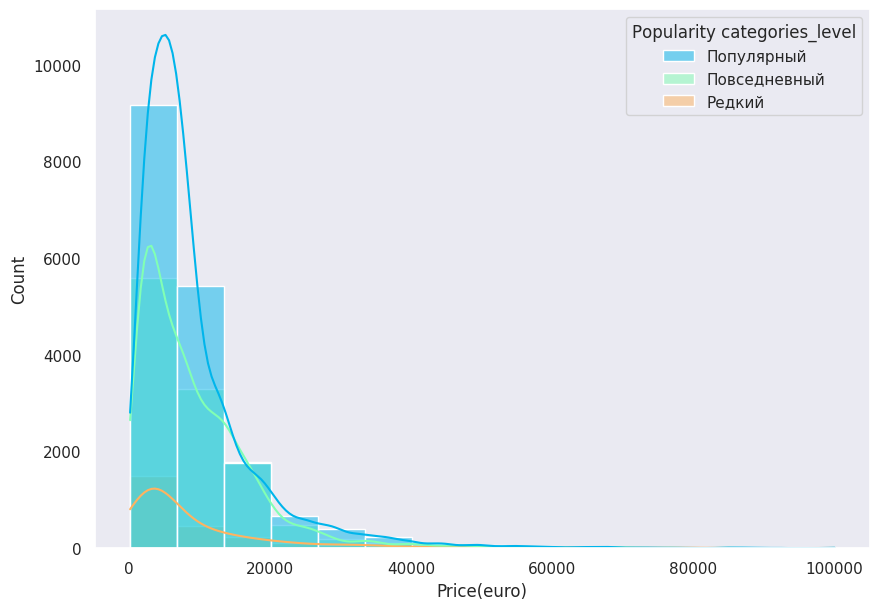

In [434]:
# Построим гистограмму стоимости автомобилей по категориям популярности
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Price(euro)',
             hue = 'Рopularity categories_level',
             bins = 15, kde = True,
             palette='rainbow')

Анализ популярности автомобиля показал, что на уровень продаж автомобиля оказывает влияние стоимость

# **Предварительная обработка данных**

### Нормализация

In [435]:
df_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

Распределение данных после нормализации

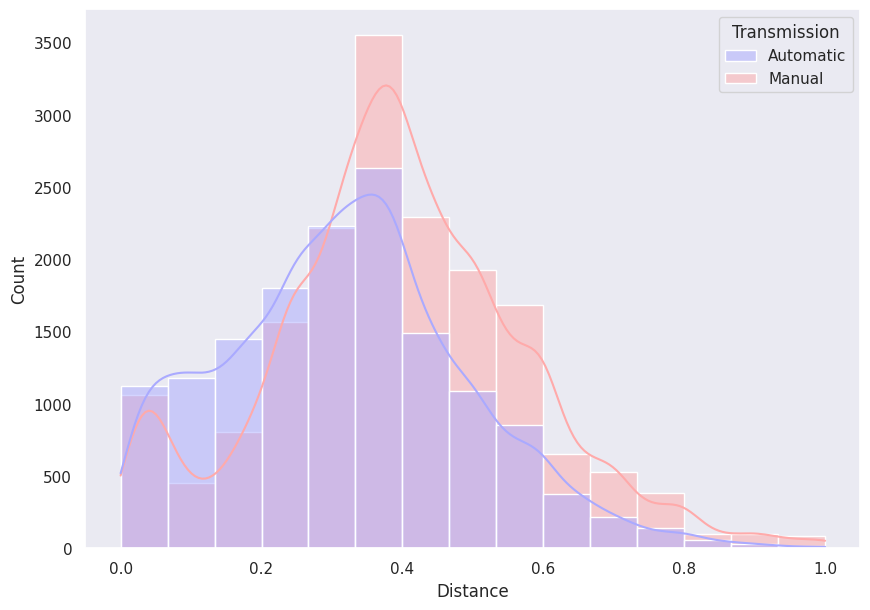

In [436]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr');

### Стандартизация

In [437]:
df_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_scaled[num_columns] = (df[num_columns]-M)/STD

Распределение данных после стандартизации

<Axes: xlabel='Distance', ylabel='Count'>

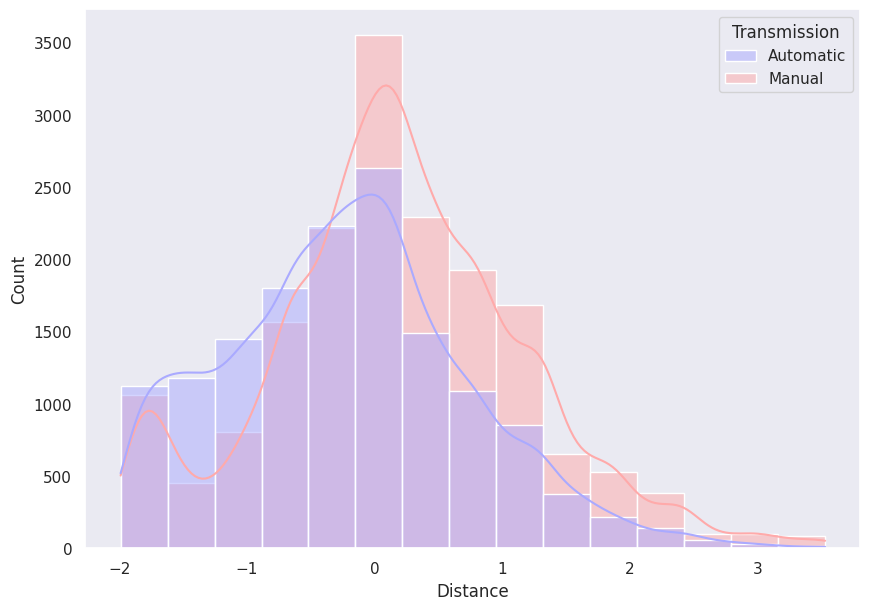

In [438]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_scaled,
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

### Нелинейное преобразование

Логарифмирование и стандартизация

In [439]:
df_power  = df.copy()
df_power[num_columns] = np.log(df_power[num_columns])
M = df_power[num_columns].mean()
STD = df_power[num_columns].std()
df_power[num_columns] = (df_power[num_columns]-M)/STD

Распределение исходных данных

<Axes: xlabel='Price(euro)', ylabel='Count'>

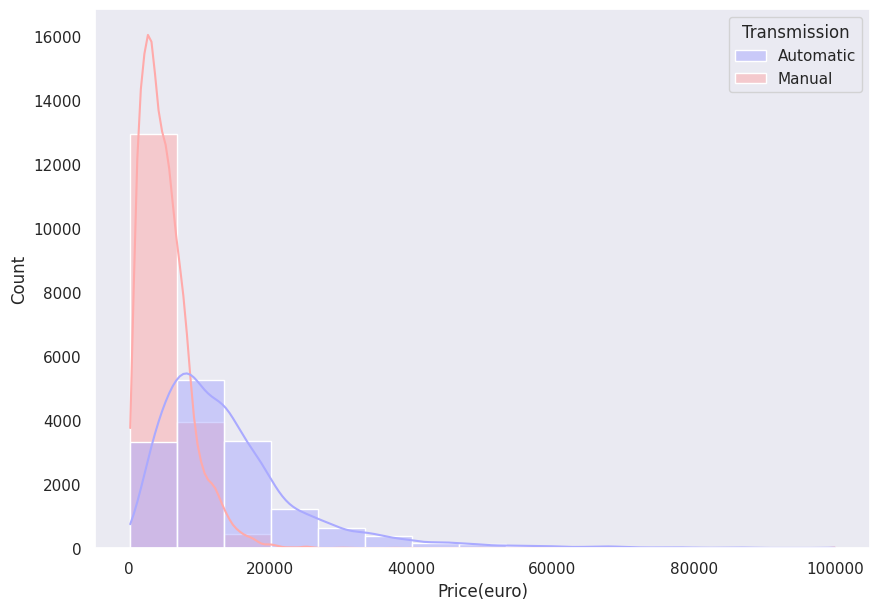

In [440]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df,
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')


Распределение данных после лагорифмирования и стандартизации

<Axes: xlabel='Price(euro)', ylabel='Count'>

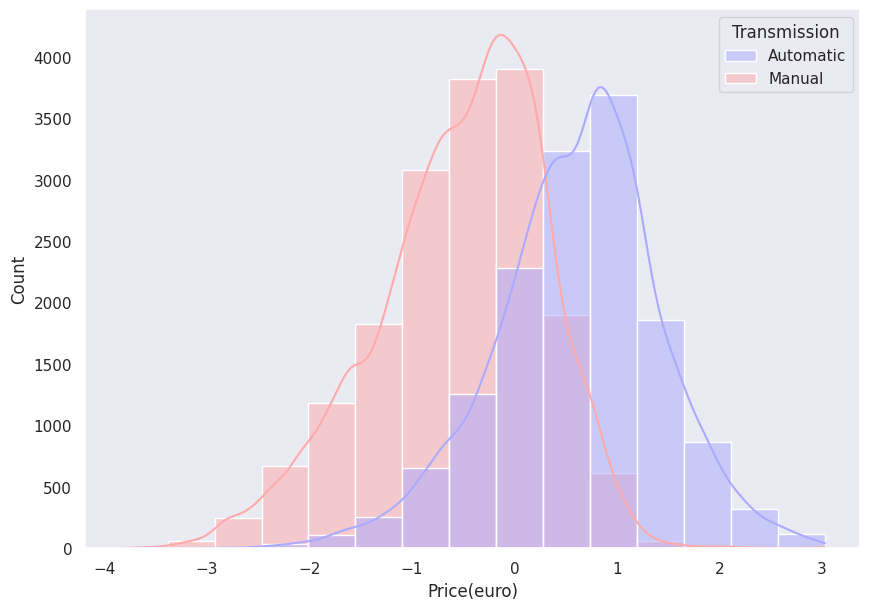

In [441]:
fig = plt.figure(figsize=(10,7))

sns.histplot(data = df_power, 
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')


График зависимости исходных данных от преобразованных

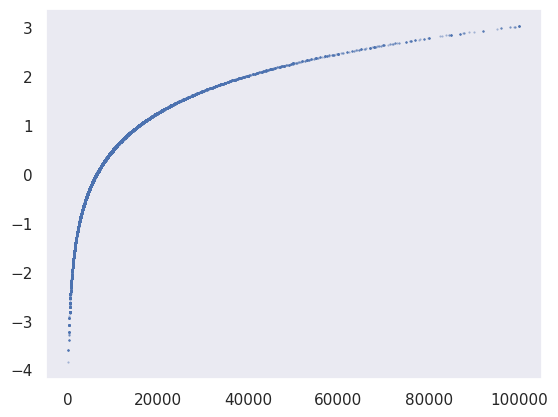

In [442]:
plt.plot(df['Price(euro)'], # что по горизонтальной оси
         df_power['Price(euro)'], # что по вертикальной оси
         '.', # чтобы не было линий. Только точки
         alpha = 0.5,  # прозрачность
         markersize = 1) # размер точек

# **Кодирование категориальных данных**

In [443]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [444]:
cols=np.array(df.columns[df.dtypes != object])
d = defaultdict(LabelEncoder)
cols

array(['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)',
       'km_year', 'Age', 'Price_mean_by_Make', 'Рopularity categories',
       'Percent_of_Price_mean_by_Make'], dtype=object)

In [445]:
df = df.apply(lambda x: d[x.name].fit_transform(x))
df

Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0        40     92    39      4      4709                   275          2   
1        32     62    42     11      2636                   208          0   
2        32     71    40     11      2009                   208          0   
3        28     23    34     11      4902                   238          3   
4        23    124    28      5      7197                   386          0   
...     ...    ...   ...    ...       ...                   ...        ...   
32069    42     88    44     10      1564                   275          4   
32070    19     53    30      3      5717                   275          3   
32071     6     77    43     11      1587                   208          0   
32072    22     10    34      1      7741                   342          0   
32073    32     62    34      6      7197                   208          0   

       Transmission  Price(euro)  km_year  Age  Price_mean_by_Make  \
0                 0          482     8035   10                  29   
1                 1          539     7584    7                  16   
2                 1          410     3836    9                  16   
3                 1          253     4741   15                   8   
4                 1          214     5496   21                  35   
...             ...          ...      ...  ...                 ...   
32069             0          691     6196    5                  18   
32070             1          276     3990   19                  42   
32071             1          445     4884    6                  14   
32072             1          247     9986   15                  13   
32073             1          247     8534   15                  16   

       Рopularity categories  Рopularity categories_level  \
0                         41                            1   
1                         38                            1   
2                         38                            1   
3                         37                            1   
4                         40                            1   
...                      ...                          ...   
32069                     42                            1   
32070                     20                            2   
32071                     33                            0   
32072                     24                            0   
32073                     38                            1   

       Percent_of_Price_mean_by_Make  Price_mean_by_Make_level  
0                                 29                         2  
1                                 16                         0  
2                                 16                         0  
3                                  8                         0  
4                                 35                         2  
...                              ...                       ...  
32069                             18                         0  
32070                             42                         1  
32071                             14                         0  
32072                             13                         0  
32073                             16                         0  

[32074 rows x 16 columns]

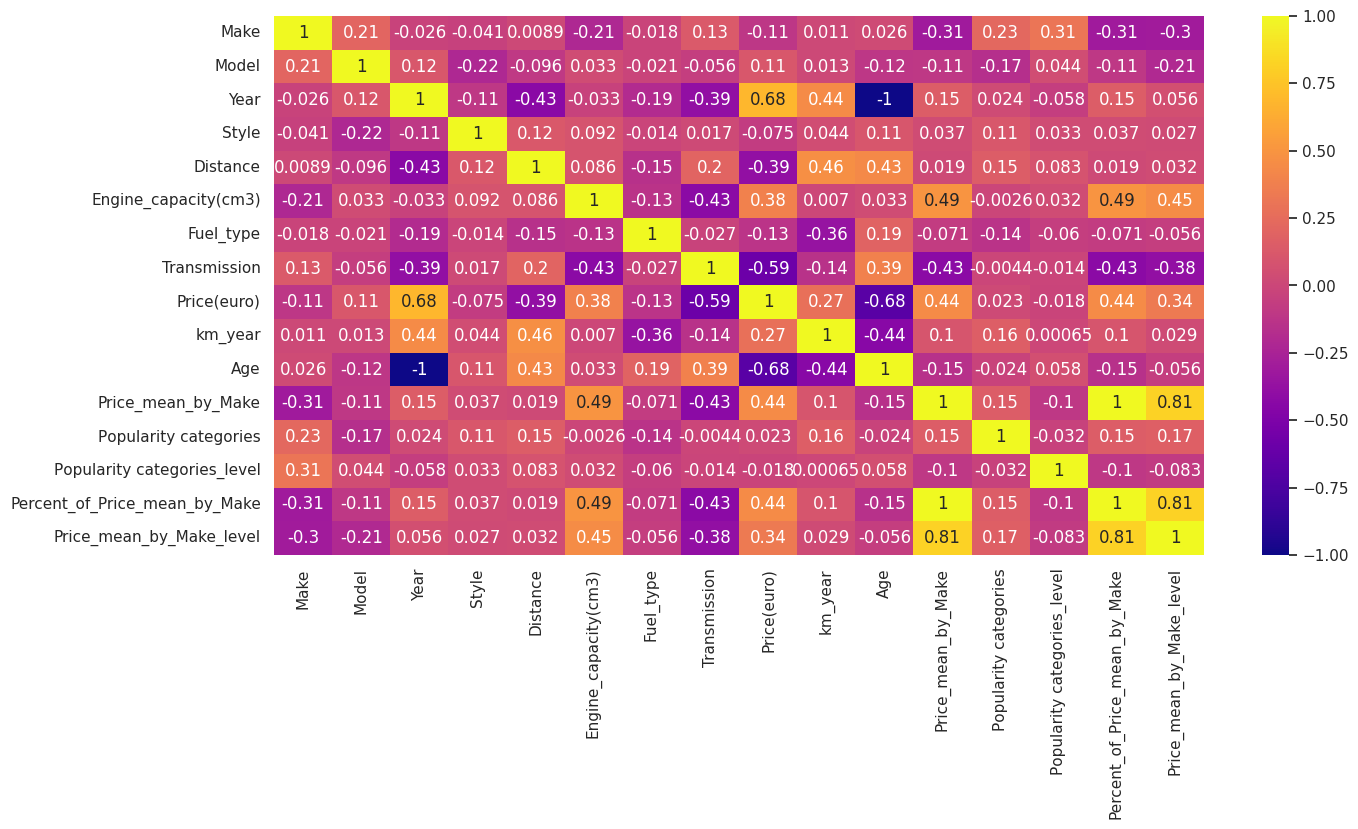

In [446]:
plt.figure(figsize = (15,7))
corr = df.corr()
sns.heatmap(corr, cmap="plasma", annot = True);

# **Регрессия Методом к-Ближайших Соседей**

In [447]:
from sklearn.neighbors import KNeighborsRegressor # Регрессия К-Ближайших соседей от scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn)

In [448]:
X,y = df.drop(columns = ['Price(euro)']).values,df['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# нормализуем 
scaler  = MinMaxScaler()
scaler.fit(X_train) # для тренировочных сначала "обучаем"
X_train = scaler.transform(X_train) # потом преобразуем  transform  
X_test  = scaler.transform(X_test)  # для тестовых - просто transform 

kNN = KNeighborsRegressor(n_neighbors=9, weights='distance' )

kNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [449]:
y_predict=kNN.predict(X_test)
#Смотрим результат

print('Оценка обучающего набора: {:.4f}'.format(kNN.score(X_train, y_train)))
print('Оценка тестового набора: {:.4f}'.format(kNN.score(X_test, y_test)))

Оценка обучающего набора: 0.9993
Оценка тестового набора: 0.8351


In [450]:
print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))

Ошибка на тестовых данных
MSE: 21440.6
RMSE: 146.4


## Поиск Лучших Гиперпараметров по Сетке Параметров

In [451]:
from sklearn.model_selection import GridSearchCV # для поиска по сетке гиперпараметров
from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
from sklearn.preprocessing import MinMaxScaler # Объект Нормализации от Scikit-learn
from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров

In [452]:
# словарь гиперпараметров в виде 
# обозначение гиперпараметров : в каких значениях проверяем 
# обозначение должно "досимвольно" совпадать с тем что в документации
parameters = {'n_neighbors':stats.randint(1,50), 
              'weights':['uniform', 'distance']}



In [453]:
n_iter_search = 20 # количество итераций  

kNN_search = RandomizedSearchCV(estimator = KNeighborsRegressor(),  # оптимизируем нашу модель
                                verbose = 0,  # чтобы он всё подробно расписал. если не интересно - пишем 0
                          param_distributions=parameters , # что оптимизируем - берем из словарика
                          cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                          n_iter = n_iter_search # количество итераций  
                          )

In [454]:
kNN_search.fit(X_train, y_train)

kNNbest=kNN_search.best_estimator_

kNNbest.fit(X_train, y_train);

Лучший Кандидат

In [455]:
kNN_search.best_estimator_

KNeighborsRegressor(n_neighbors=8, weights='distance')

Оценим лучшего кандидата

In [456]:
kNN = KNeighborsRegressor(n_neighbors=4, weights='distance' )
kNN.fit(X_train, y_train)
y_predict=kNN.predict(X_test)
print('Оценка обучающего набора: {:.4f}'.format(kNN.score(X_train, y_train)))
print('Оценка тестового набора: {:.4f}'.format(kNN.score(X_test, y_test)))

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))

Оценка обучающего набора: 0.9993
Оценка тестового набора: 0.8330
Ошибка на тестовых данных
MSE: 21717.8
RMSE: 147.4


Визуализация предсказаний модели и реальных значений

<ipython-input-457-453051a29ded>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )


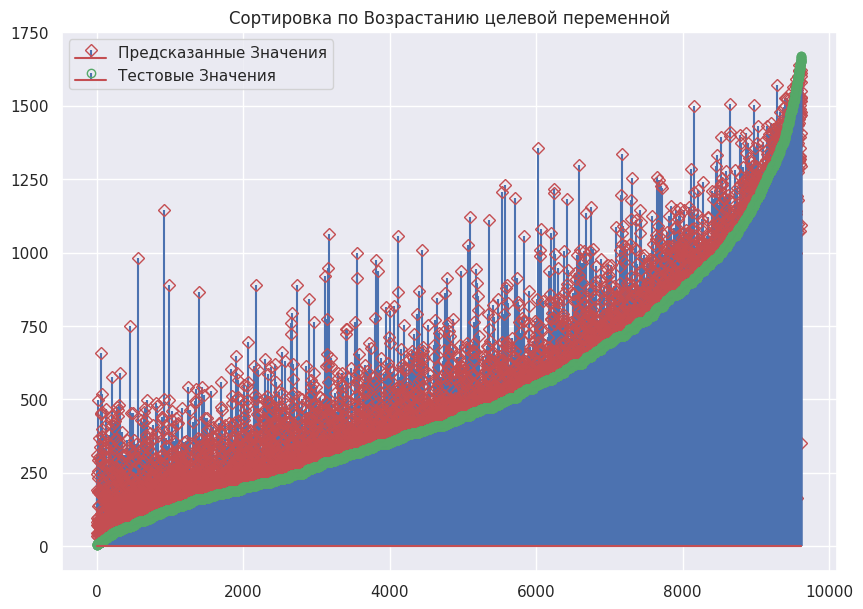

In [457]:
def print_stem(y, label, marker):
    markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label,use_line_collection = True, )
    markerline.set_markerfacecolor('none')
    
fig=plt.figure(figsize=(10, 7))
sorted = np.argsort(y_test)
print_stem(y_predict[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test[sorted], 'Тестовые Значения', 'go')

plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend();
     

# **Neighborhood Components Analysis**

In [458]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis # Neighborhood Components Analysis от scikit-learn
from sklearn.neighbors import  KNeighborsClassifier # Классификация К-Ближайших соседей от scikit-learn

from sklearn.metrics import classification_report # функция scikit-learn которая считает много метрик классификации
from sklearn.model_selection import StratifiedKFold # при кросс-валидации разбиваем данные в пропорции целевой метки
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import confusion_matrix # матрица ошибок от Scikit-learn

from sklearn.metrics import accuracy_score as acc # функция расчета доли правильных ответов от Scikit-learn
from sklearn.metrics import f1_score as f1 # функция расчета f1-меры от Scikit-learn

In [459]:
X = df[num_columns].values  # берем, например только числовые данные 
y = df["Рopularity categories_level"].values # для классификации целевая метрика - "Рopularity categories_level

features_names = df[num_columns].columns
# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# нормализуем 
scaler  = MinMaxScaler()
scaler.fit(X_train) # для тренировочных сначала "обучаем"
X_train = scaler.transform(X_train) # потом преобразуем  transform 
X_test  = scaler.transform(X_test) # для тестовых - просто transform 

Считываем данные, разбиваем на тестовую и тренировочную, нормализуем

In [460]:
nca = NeighborhoodComponentsAnalysis(n_components=3)
nca.fit(X_test,y_test)
X_nca = nca.transform(X_test)

In [461]:
X_nca_train = nca.transform(X_train)

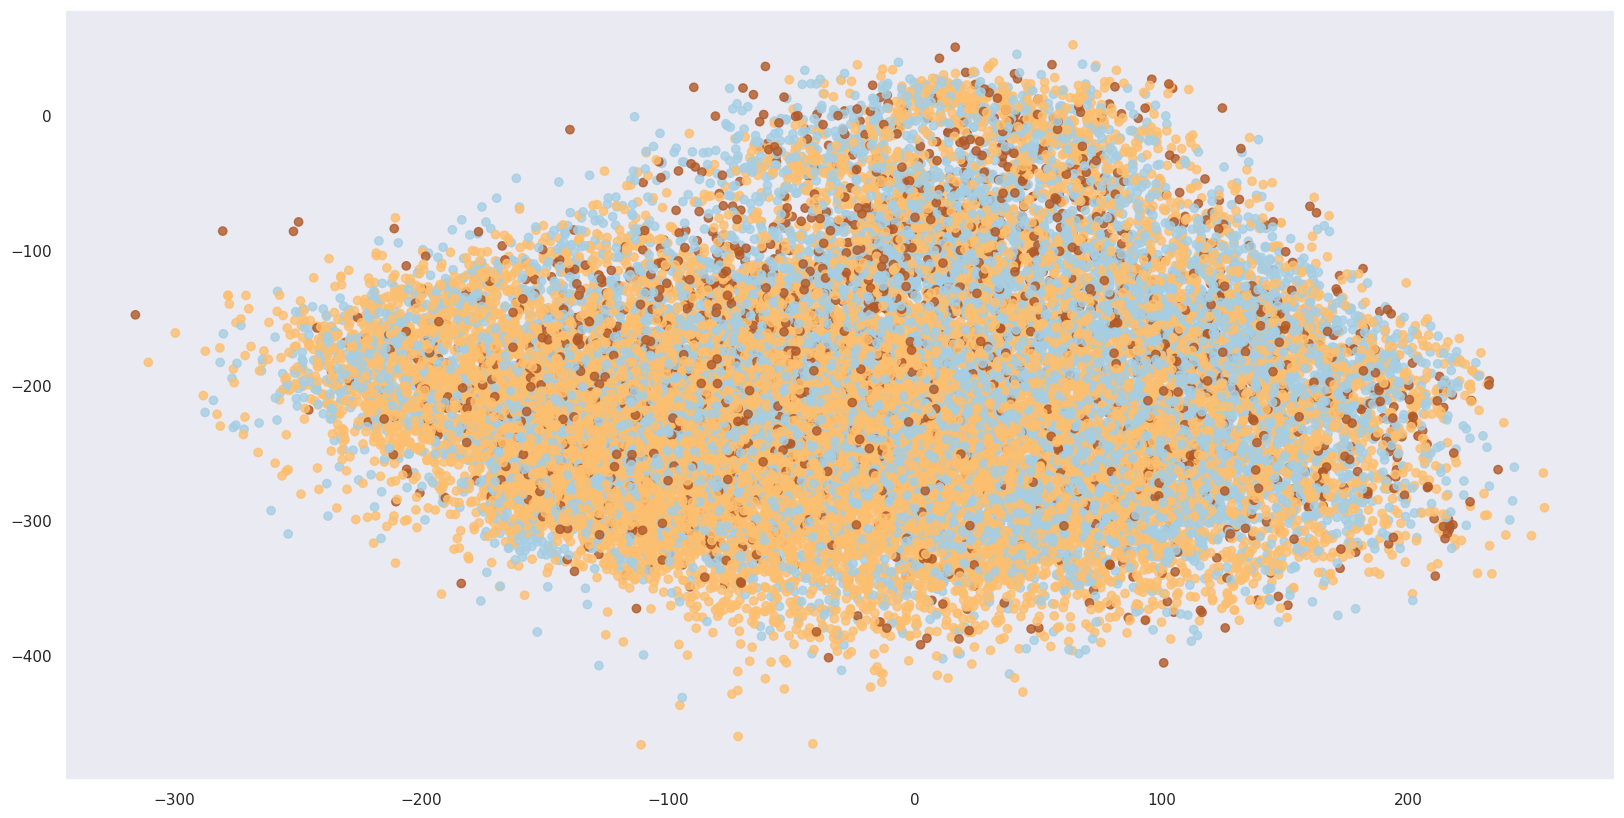

In [462]:
plt.figure(figsize=(20,10))
plt.scatter(X_nca_train[:,0],X_nca_train[:,1],
            c =y_train, # подсвечиваем по целевой метке
            alpha = 0.8, cmap ='Paired' ,); 

Достаточно много точек разбилось ровно


Визуализация "весов" преобразования

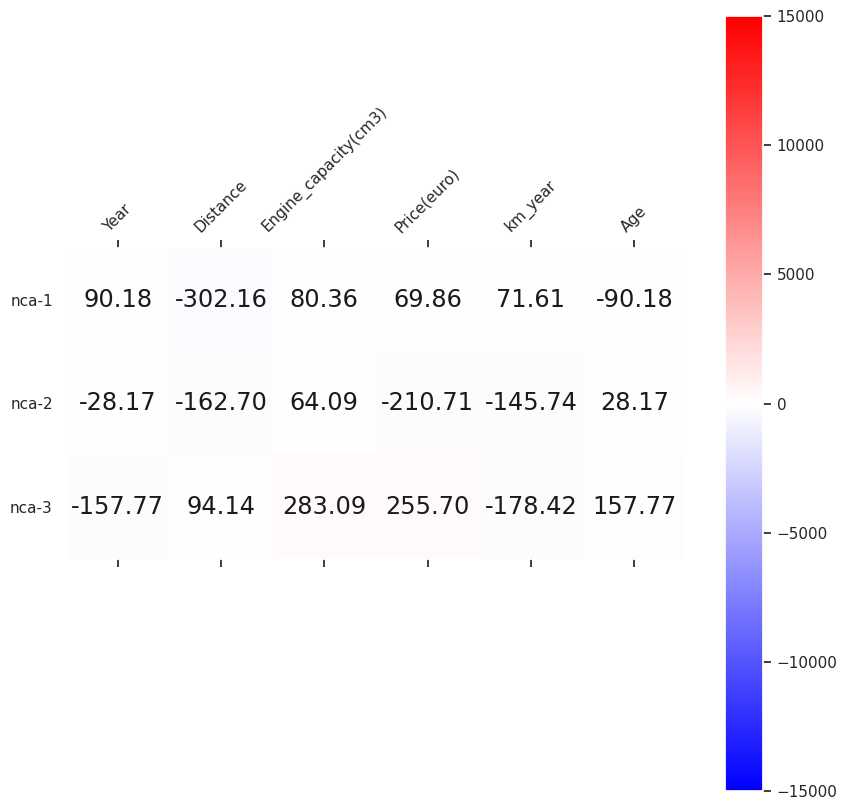

In [463]:
fig=plt.figure(figsize=(10,10))
W = nca.components_
nca_names = ['nca-'+str(x+1) for x in range(W.shape[0])]
plt.matshow(W.astype(float),cmap='bwr',vmin=-15000,vmax=15000, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), features_names,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),nca_names)
plt.colorbar();